# Connect to Google Drive

In [ ]:
# You need to download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

Mounted at /content/gdrive
total 24
-rw------- 1 root root 23875 Oct 17  2023 diabetes2.csv


# Load Data

In [ ]:
import pandas as pd

# load data from "diabetes2.csv" file located on google drive
rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')

In [ ]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Task 1: Preprocess Data

In [ ]:
# putting the results into our target
data = rawdata.drop("Outcome", axis = 1, inplace = False).astype(float)
target = rawdata["Outcome"].copy()

print(data.shape)
print(target.shape)

(768, 8)
(768,)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

data_preprocessed = pipeline.fit_transform(data)
target_preprocessed = target.values

# Task 2: Split Dataset for Training, Validation, and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# splitting date into training and testing data
train_data, valid_data, train_target, valid_target = train_test_split(data_preprocessed, target_preprocessed, test_size = 0.2, random_state = 42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size = 0.25, random_state = 42)

print(train_data.shape)
print(train_target.shape)
print()
print(valid_data.shape)
print(valid_target.shape)
print()
print(test_data.shape)
print(test_target.shape)

(460, 8)
(460,)

(154, 8)
(154,)

(154, 8)
(154,)


# Task 3: Use Logistic Regression using Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_data, train_target)

print("Coefficients: \n", lr.coef_)
print("Intercept: \n", lr.intercept_)
print()

from sklearn.metrics import log_loss
print("Training loss using sklearn - log_loss: %.2f" % log_loss(train_target, lr.predict_proba(train_data)))
print("Validation loss using sklearn - log_loss: %.2f" % log_loss(valid_target, lr.predict_proba(valid_data)))
print("Testing loss using sklearn - log_loss: %.2f" % (log_loss(test_target, lr.predict_proba(test_data))))

Coefficients: 
 [[ 0.18608665  0.89291547 -0.3654731   0.10722222 -0.15002067  0.78439923
   0.18462809  0.56210975]]
Intercept: 
 [-0.87646845]

Training loss using sklearn - log_loss: 0.48
Validation loss using sklearn - log_loss: 0.53
Testing loss using sklearn - log_loss: 0.45


# Task 4: Implement stochastic gradient descent method to perform logistic regression

In [ ]:
import numpy as np

# implementing logistic regression with SGD
class LogisticRegressionSGD:
  def __init__(self, learning_rate = 0.001, epochs = 1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.train_errors = []
    self.val_errors = []

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X_train, y_train, X_val = None, y_val = None):
    n_samples, n_features = X_train.shape
    # initialize weights as 0
    self.weights = np.zeros(n_features)
    # set bias to 0
    self.bias = 0

    for epoch in range(self.epochs):
      # Shuffle the training data to ensure randomness
      indices = np.random.permutation(n_samples)
      X_train_shuffled = X_train[indices]
      y_train_shuffled = y_train[indices]

      # loop through each sample
      for i in range(n_samples):
        # single sample
        xi = X_train_shuffled[i]
        # corresponding target value
        yi = y_train_shuffled[i]

        # linear combination
        linear_output = np.dot(xi, self.weights) + self.bias
        prediction = self.sigmoid(linear_output)

        # compute the gradient
        dw = (prediction - yi) * xi
        db = (prediction - yi)

        # update weights and bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

        # record the training loss after each batch
        train_predictions = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
        train_loss = self.compute_loss(train_predictions, y_train)
        self.train_errors.append(train_loss)

        # record validation loss, if validation data is given
        if X_val is not None and y_val is not None:
          val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
          val_loss = self.compute_loss(val_predictions, y_val)
          self.val_errors.append(val_loss)

      # print progress every 100 epochs
      if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1} - Training Loss: {train_loss:.4f}")
        if X_val is not None and y_val is not None:
          print(f"Validation Loss: {val_loss:.4f}")

  def compute_loss(self, predictions, y):
    n_samples = len(y)
    loss = -(1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

  def predict(self, X):
    # linear combination
    predictions = np.dot(X, self.weights) + self.bias
    # apply sigmoid function
    predictions = self.sigmoid(predictions)

    # predict 0 if y <= 0.5, or 1 otherwise
    class_predictions = [0 if y <= 0.5 else 1 for y in predictions]

    return class_predictions

Epoch 100 - Training Loss: 0.4768
Validation Loss: 0.5257
Epoch 200 - Training Loss: 0.4767
Validation Loss: 0.5299
Epoch 300 - Training Loss: 0.4767
Validation Loss: 0.5301
Epoch 400 - Training Loss: 0.4767
Validation Loss: 0.5301
Epoch 500 - Training Loss: 0.4767
Validation Loss: 0.5301
Epoch 600 - Training Loss: 0.4767
Validation Loss: 0.5303
Epoch 700 - Training Loss: 0.4767
Validation Loss: 0.5301
Epoch 800 - Training Loss: 0.4767
Validation Loss: 0.5302
Epoch 900 - Training Loss: 0.4767
Validation Loss: 0.5302
Epoch 1000 - Training Loss: 0.4767
Validation Loss: 0.5300
Coefficients: 
 [ 0.18208893  0.9112133  -0.38362289  0.11259555 -0.16006999  0.80746698
  0.18705716  0.57476678]
Intercept: 
 -0.8845249945335901


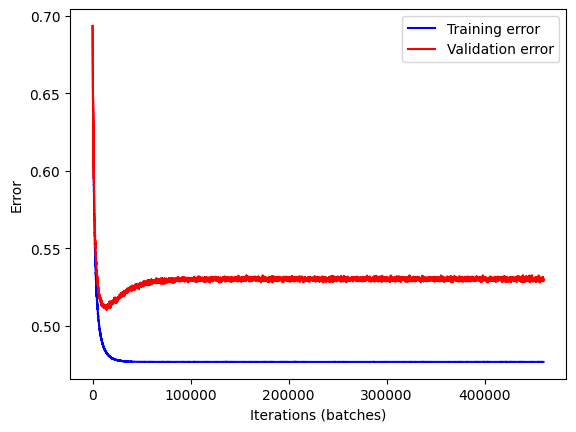

Training accuracy using SGD: 0.77
Validation accuracy using SGD: 0.73


In [ ]:
import matplotlib.pyplot as plt

lr = LogisticRegressionSGD()
lr.fit(train_data, train_target, valid_data, valid_target)

print("Coefficients: \n", lr.weights)
print("Intercept: \n", lr.bias)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

def plot_learning_curve(train_errors, val_errors=None):
  iterations = range(1, len(train_errors) + 1)
  plt.plot(iterations, train_errors, 'b', label='Training error')
  if val_errors is not None:
      plt.plot(iterations, val_errors, 'r', label='Validation error')
  plt.xlabel('Iterations (batches)')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

plot_learning_curve(lr.train_errors, lr.val_errors)

print("Training accuracy using SGD: %.2f" % (accuracy(train_target, lr.predict(train_data))))
print("Validation accuracy using SGD: %.2f" % (accuracy(valid_target, lr.predict(valid_data))))

# Task 5: Create and train a logistic regression classifier in PyTorch

torch.Size([460, 8])
torch.Size([460, 1])
Epoch: 1000 - Training Loss = 0.6482, Validation Loss = 0.6472
Epoch: 2000 - Training Loss = 0.5747, Validation Loss = 0.5748
Epoch: 3000 - Training Loss = 0.5386, Validation Loss = 0.5367
Epoch: 4000 - Training Loss = 0.5188, Validation Loss = 0.5143
Epoch: 5000 - Training Loss = 0.5069, Validation Loss = 0.4998
Epoch: 6000 - Training Loss = 0.4992, Validation Loss = 0.4899
Epoch: 7000 - Training Loss = 0.4939, Validation Loss = 0.4827
Epoch: 8000 - Training Loss = 0.4901, Validation Loss = 0.4773
Epoch: 9000 - Training Loss = 0.4874, Validation Loss = 0.4732
Epoch: 10000 - Training Loss = 0.4853, Validation Loss = 0.4699
Accuracy =  0.7468


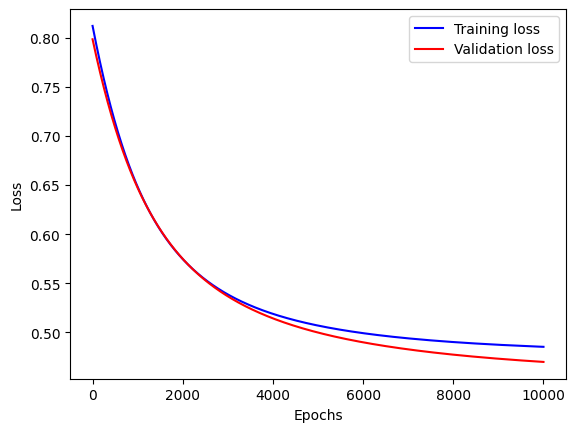

In [ ]:
import torch
import torch.nn as nn

# create tensors from train_data and train_target
X_train = torch.from_numpy(train_data).float()
y_train = torch.from_numpy(train_target).float()
X_test = torch.from_numpy(test_data).float()
y_test = torch.from_numpy(test_target).float()

# reshape tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

print(X_train.shape)
print(y_train.shape)

class LogisticRegressionTensor(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegressionTensor, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

lrt = LogisticRegressionTensor(X_train.shape[1])

# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(lrt.parameters(), lr = 0.001)

# lists to store losses
train_losses = []
val_losses = []

epochs = 10000
for epoch in range(epochs):
  # forward pass/loss
  # set model to training mode
  lrt.train()
  y_pred = lrt(X_train)
  loss = criterion(y_pred, y_train)

  # store training loss
  train_losses.append(loss.item())

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  # empty gradients
  optimizer.zero_grad()

  # calculate validation loss
  # set model to evaluation mode
  lrt.eval()
  with torch.no_grad():
    y_val_pred = lrt(X_test)
    val_loss = criterion(y_val_pred, y_test)
    val_losses.append(val_loss.item())

  if (epoch + 1) % 1000 == 0:
    print(f'Epoch: {epoch + 1} - Training Loss = {loss.item():.4f}, Validation Loss = {val_loss.item():.4f}')

# don't keep track of gradients
with torch.no_grad():
  y_pred = lrt(X_test)
  y_pred_classes = y_pred.round()

  accuracy = y_pred_classes.eq(y_test).sum() / float(y_test.shape[0])
  print(f'Accuracy = {accuracy: .4f}')

# plot training and validation losses
def plot_learning_curves(train_losses, val_losses):
  epochs = range(1, len(train_losses) + 1)
  plt.plot(epochs, train_losses, 'b', label = 'Training loss')
  plt.plot(epochs, val_losses, 'r', label = 'Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_learning_curves(train_losses, val_losses)